# I) Préparation de l’environnement Python et importation des données

## 1) Importation des libraries


In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## 2) Importation des données

In [2]:
aide_alimentaire = pd.read_csv("DATA_en/aide_alimentaire_en.csv", sep=";")
sous_nutrition_en = pd.read_csv("DATA_en/sous_nutrition_en.csv", sep=";")
bilan_cereale = pd.read_csv("DATA_en/bilan_cereale.csv", sep=";")
dispo_alimentaire_vegetal_en = pd.read_csv("DATA_en/dispo_alimentaire_vegetal_en.csv", sep=";")
dispo_alimentaire_animal_en = pd.read_csv("DATA_en/dispo_alimentaire_animal_en.csv", sep=";")
population_en = pd.read_csv("DATA_en/population_en.csv", sep=";")
pib_en = pd.read_csv("DATA_en/pib_en.csv", sep=";")

In [3]:
print(aide_alimentaire.head(3))
print("____________________________________")
print(sous_nutrition_en.head(3))
print("____________________________________")
print(bilan_cereale.head(3))
print("____________________________________")
print(dispo_alimentaire_vegetal_en.head(3))
print("____________________________________")
print(dispo_alimentaire_animal_en.head(3))
print("____________________________________")
print(population_en.head(3))
print("____________________________________")
print(pib_en.head(3))

   Recipient Country Code (FAO) Recipient Country  Element Code  \
0                             2       Afghanistan           500   
1                             2       Afghanistan           500   
2                             2       Afghanistan           500   

             Element  Item Code                Item  Year    Unit  Value  
0  Food aid received      12061             Cereals  2013  tonnes  40504  
1  Food aid received      12061             Cereals  2014  tonnes  15989  
2  Food aid received      11733  Dried Fruits Total  2013  tonnes     85  
____________________________________
   AreaCode         Area  ElementCode Element  ItemCode  \
0         2  Afghanistan         6121   Value    210041   
1         2  Afghanistan         6132   Value    210011   
2         3      Albania         6121   Value    210041   

                                                Item       Year      Unit  \
0  Prevalence of undernourishment (percent) (3-ye...  2016-2018         %   
1  

In [4]:
#concaténation du DF Dispo_alimentaire_vegetal_en avec le DF de la dispo alimentaire d'origine animale
dispo_alimentaire_total = pd.concat([dispo_alimentaire_vegetal_en, dispo_alimentaire_animal_en]) 
dispo_alimentaire_total

Domain  AreaCode         Area  ElementCode  \
0      Vegetal         2  Afghanistan         5511   
1      Vegetal         2  Afghanistan         5611   
2      Vegetal         2  Afghanistan         5072   
3      Vegetal         2  Afghanistan         5911   
4      Vegetal         2  Afghanistan         5301   
...        ...       ...          ...          ...   
41780   Animal       181     Zimbabwe         5142   
41781   Animal       181     Zimbabwe          645   
41782   Animal       181     Zimbabwe          664   
41783   Animal       181     Zimbabwe          674   
41784   Animal       181     Zimbabwe          684   

                                      Element  ItemCode                Item  \
0                                  Production      2511  Wheat and products   
1                             Import Quantity      2511  Wheat and products   
2                             Stock Variation      2511  Wheat and products   
3                             Export Quantity      2511  Wheat and products   
4                    Domestic supply quantity      2511  Wheat and products   
...                                       ...       ...                 ...   
41780                                    Food      2775      Aquatic Plants   
41781     Food supply quantity (kg/capita/yr)      2775      Aquatic Plants   
41782           Food supply (kcal/capita/day)      2775      Aquatic Plants   
41783  Protein supply quantity (g/capita/day)      2775      Aquatic Plants   
41784      Fat supply quantity (g/capita/day)      2775      Aquatic Plants   

       Year             Unit   Value  
0      2017      1000 tonnes  4281.0  
1      2017      1000 tonnes  3080.0  
2      2017      1000 tonnes   208.0  
3      2017      1000 tonnes     2.0  
4      2017      1000 tonnes  7151.0  
...     ...              ...     ...  
41780  2017      1000 tonnes     0.0  
41781  2017               kg     0.0  
41782  2017  kcal/capita/day     0.0  
41783  2017     g/capita/day     0.0  
41784  2017     g/capita/day     0.0  

[183688 rows x 10 columns]

# II) Analyse de la sous-nutrition mondiale
## 1) Proportion de personnes en état de sous-nutrition en 2017

In [5]:
# Somme de la population mondiale
Total_pop = population_en['Value'].sum()*1000
print(Total_pop)

7481124000


In [6]:
# Filtre des données : On en garde que le nombre de personne en état de sous nutrition (ElementCode 6132) 
# et les pays où ce nombre est différent de "<0.1" et de "NaN"
ssNutri_filter = sous_nutrition_en.loc[(sous_nutrition_en['ElementCode'] == 6132) & (sous_nutrition_en['Value'] != '<0.1')].dropna(subset = ['Value'])

In [7]:
ssNutri_filter.dtypes

AreaCode         int64
Area            object
ElementCode      int64
Element         object
ItemCode         int64
Item            object
Year            object
Unit            object
Value           object
Note           float64
dtype: object

In [8]:
# Transformation du types de 'Value' en numérique décimal (float) 
ssNutri_filter['Value']=pd.to_numeric(ssNutri_filter.Value)
ssNutri_filter.dtypes

AreaCode         int64
Area            object
ElementCode      int64
Element         object
ItemCode         int64
Item            object
Year            object
Unit            object
Value          float64
Note           float64
dtype: object

In [9]:
# Calcul du nombre total de personne en état de sous-nutrition dans le monde

total_ssNutri=ssNutri_filter['Value'].sum()*1000000
print(total_ssNutri)

554800000.0


In [10]:
# Calcul du pourcentage de personne en état de sous-nutrition dans le monde
round((total_ssNutri/Total_pop)*100,2)

7.42

### Représentation du nombre de personne en sous-nutrition par pays

In [11]:
fig = px.bar(ssNutri_filter, x='Area', y='Value',color='Value',
                         labels={
                     "Value": "Nombre d'habitants<br>en sous-nutrition (en million)",
                     "Area": "Pays"})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_coloraxes(colorscale='Viridis')
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
fig.update_xaxes(tickfont=dict(size=8))
fig.show()

### Représentation du pourcentage de personne en sous-nutrition par pays

In [12]:
ssNutri_Prev_filter = sous_nutrition_en.loc[(sous_nutrition_en['ElementCode'] == 6121) & (sous_nutrition_en['Value'] != '<2.5')].dropna(subset = ['Value'])
ssNutri_Prev_filter.dtypes

AreaCode         int64
Area            object
ElementCode      int64
Element         object
ItemCode         int64
Item            object
Year            object
Unit            object
Value           object
Note           float64
dtype: object

In [13]:
ssNutri_Prev_filter['Value']=pd.to_numeric(ssNutri_Prev_filter.Value)
ssNutri_Prev_filter.dtypes

AreaCode         int64
Area            object
ElementCode      int64
Element         object
ItemCode         int64
Item            object
Year            object
Unit            object
Value          float64
Note           float64
dtype: object

In [14]:
fig = px.bar(ssNutri_Prev_filter, x='Area', y='Value', color ='Value',
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={"Value": "Pourcentage de la population<br>en sous-nutrition",
                     "Area": "Pays"})
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
fig.update_xaxes(tickfont=dict(size=10))
fig.show()

## 2) Répartition de l’aide alimentaire entre 2013 à 2016

In [15]:
aide_alimentaire.head()

Recipient Country Code (FAO) Recipient Country  Element Code  \
0                             2       Afghanistan           500   
1                             2       Afghanistan           500   
2                             2       Afghanistan           500   
3                             2       Afghanistan           500   
4                             2       Afghanistan           500   

             Element  Item Code                Item  Year    Unit  Value  
0  Food aid received      12061             Cereals  2013  tonnes  40504  
1  Food aid received      12061             Cereals  2014  tonnes  15989  
2  Food aid received      11733  Dried Fruits Total  2013  tonnes     85  
3  Food aid received      12062         Non-Cereals  2013  tonnes  23615  
4  Food aid received      12062         Non-Cereals  2014  tonnes  12618

In [16]:
# Faire la somme de l'aide alimentaire : aggrégation par Recipient Country
Aide_aliSUm = aide_alimentaire.groupby(['Recipient Country','Year'], as_index=False).sum()

In [17]:
Aide_aliSUm.head()

Recipient Country  Year  Recipient Country Code (FAO)  Element Code  \
0       Afghanistan  2013                            16          4000   
1       Afghanistan  2014                            16          4000   
2           Algeria  2013                            44          5500   
3           Algeria  2014                            40          5000   
4           Algeria  2015                            40          5000   

   Item Code   Value  
0      93050  128238  
1      93207   57214  
2     127026   35234  
3     115293   18980  
4     115238   17424

In [18]:
Aide_aliSUm = Aide_aliSUm.sort_values('Value',ascending=False)

fig = px.bar(Aide_aliSUm, x='Recipient Country', y='Value', facet_row='Year', color='Value',
             color_continuous_scale=px.colors.sequential.Viridis,
            labels={
                     "Value": "Aide alimentaire<br>reçue (tonnes)",
                     "Recipient Country": "Pays bénéficiaire",
                     "Year": "Année",
                 })
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=800)
fig.update_xaxes(tickfont=dict(size=8))
fig.update(layout_showlegend=False)
fig.update_layout({
    'legend_title_text': ''})
fig.show()


## 3) Résumé des 10 pays les plus en difficulté alimentaire

### En terme de pourcentage de population :

In [19]:
ssNutri_Prev_10 = ssNutri_Prev_filter.nlargest(10, 'Value')
print(ssNutri_Prev_10)

     AreaCode                                   Area  ElementCode Element  \
336       201                                Somalia         6121   Value   
162        93                                  Haiti         6121   Value   
400       249                                  Yemen         6121   Value   
68         37               Central African Republic         6121   Value   
102       116  Democratic People's Republic of Korea         6121   Value   
216       129                             Madagascar         6121   Value   
104       250       Democratic Republic of the Congo         6121   Value   
176       103                                   Iraq         6121   Value   
208       123                                Liberia         6121   Value   
86         46                                  Congo         6121   Value   

     ItemCode                                               Item       Year  \
336    210041  Prevalence of undernourishment (percent) (3-ye...  2016-20

In [20]:
fig = px.bar(ssNutri_Prev_10, x='Area', y='Value', color ='Value',
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={
                    "Value": "Pourcentage de la population<br>en sous-nutrition",
                     "Area": "Pays" })
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
fig.update_xaxes(tickfont=dict(size=12))
fig.show()

In [21]:
## Figure à la verticale ##
#fig = px.bar(ssNutri_Prev_10, y='Area', x='Value', color ='Value',
#             color_continuous_scale=px.colors.sequential.Viridis,
#             labels={
#                    "Value": "Pourcentage de la population<br>en sous-nutrition",
#                     "Area": "Pays" })
#fig.update_layout(yaxis={'categoryorder':'total ascending'},
#                 height=1000,
#                 width=800)
#fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
#fig.update_xaxes(tickfont=dict(size=15))
#fig.show()

### En terme de nombre de personnes :

In [22]:
ssNutri_Tot_10 = ssNutri_filter.nlargest(10, 'Value')
print(ssNutri_Tot_10)

     AreaCode                              Area  ElementCode Element  \
171       100                             India         6132   Value   
105       250  Democratic Republic of the Congo         6132   Value   
275       165                          Pakistan         6132   Value   
29         16                        Bangladesh         6132   Value   
265       159                           Nigeria         6132   Value   
173       101                         Indonesia         6132   Value   
129       238                          Ethiopia         6132   Value   
177       103                              Iraq         6132   Value   
387       215       United Republic of Tanzania         6132   Value   
401       249                             Yemen         6132   Value   

     ItemCode                                               Item       Year  \
171    210011  Number of people undernourished (million) (3-y...  2016-2018   
105    210011  Number of people undernourished (m

In [23]:
fig = px.bar(ssNutri_Tot_10, x='Area', y='Value', color ='Value',
            color_continuous_scale=px.colors.sequential.Viridis,
             labels={
                     "Value": "Nombre d'habitants<br>en sous-nutrition (en million)",
                     "Area": "Pays"})
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
fig.update_xaxes(tickfont=dict(size=12))
fig.show()

### Au niveau de l'aide alimentaire :

In [24]:
#Liste des 10 pays ayant reçu le plus d'aide alimentaire depuis 2013
Aide_aliSUmTot= aide_alimentaire.groupby(['Recipient Country'], as_index=False).sum()
Aide_aliSUmTot10 = Aide_aliSUmTot.nlargest(10, 'Value')
print(Aide_aliSUmTot10)

                   Recipient Country  Recipient Country Code (FAO)  \
66              Syrian Arab Republic                          8056   
27                          Ethiopia                          7854   
73                             Yemen                          9462   
63                       South Sudan                          6094   
65                             Sudan                          6624   
40                             Kenya                          3078   
3                         Bangladesh                           400   
62                           Somalia                          5427   
20  Democratic Republic of the Congo                          6250   
55                             Niger                          4898   

    Element Code  Item Code   Year    Value  
66         19000     436980  76543  1858943  
27         16500     379389  66460  1381294  
73         19000     438644  76553  1206484  
63         11000     257907  44309   695248  

In [25]:
fig = px.bar(Aide_aliSUmTot10, x='Recipient Country', y='Value', color ='Value',
                          color_continuous_scale=px.colors.sequential.Viridis,
            labels={
                     "Value": "Aide alimentaire<br>reçue (tonnes)",
                     "Recipient Country": "Pays bénéficiaire",
                     "Year": "Année",
                 })
#fig.update_traces(marker_coloraxis=None)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=500)
fig.update_xaxes(tickfont=dict(size=12))
fig.show()

# III) Analyse de la disponibilité alimentaire en 2017

## 1) Le nombre théorique de personnes qui pourraient être nourries en 2017

Pour calculer le nombre théorique de personne qui pourraient être nourries en 2017, il faut tout d’abord additionner la disponibilité energétique en Kcal/personne/jour) de chaque catégorie d’aliments par pays.

In [26]:
dispo_alimentaire_total

Domain  AreaCode         Area  ElementCode  \
0      Vegetal         2  Afghanistan         5511   
1      Vegetal         2  Afghanistan         5611   
2      Vegetal         2  Afghanistan         5072   
3      Vegetal         2  Afghanistan         5911   
4      Vegetal         2  Afghanistan         5301   
...        ...       ...          ...          ...   
41780   Animal       181     Zimbabwe         5142   
41781   Animal       181     Zimbabwe          645   
41782   Animal       181     Zimbabwe          664   
41783   Animal       181     Zimbabwe          674   
41784   Animal       181     Zimbabwe          684   

                                      Element  ItemCode                Item  \
0                                  Production      2511  Wheat and products   
1                             Import Quantity      2511  Wheat and products   
2                             Stock Variation      2511  Wheat and products   
3                             Export Quantity      2511  Wheat and products   
4                    Domestic supply quantity      2511  Wheat and products   
...                                       ...       ...                 ...   
41780                                    Food      2775      Aquatic Plants   
41781     Food supply quantity (kg/capita/yr)      2775      Aquatic Plants   
41782           Food supply (kcal/capita/day)      2775      Aquatic Plants   
41783  Protein supply quantity (g/capita/day)      2775      Aquatic Plants   
41784      Fat supply quantity (g/capita/day)      2775      Aquatic Plants   

       Year             Unit   Value  
0      2017      1000 tonnes  4281.0  
1      2017      1000 tonnes  3080.0  
2      2017      1000 tonnes   208.0  
3      2017      1000 tonnes     2.0  
4      2017      1000 tonnes  7151.0  
...     ...              ...     ...  
41780  2017      1000 tonnes     0.0  
41781  2017               kg     0.0  
41782  2017  kcal/capita/day     0.0  
41783  2017     g/capita/day     0.0  
41784  2017     g/capita/day     0.0  

[183688 rows x 10 columns]

In [27]:
# On filtre le jeu de donnée pour récupérer uniquement Food supply (kcal/capita/day), corerspondant a l'ElementCode 664
FoodSupply_filter = dispo_alimentaire_total.loc[(dispo_alimentaire_total['ElementCode'] == 664)].dropna(subset = ['Value'])
FoodSupply_filter

Domain  AreaCode         Area  ElementCode  \
11     Vegetal         2  Afghanistan          664   
25     Vegetal         2  Afghanistan          664   
39     Vegetal         2  Afghanistan          664   
54     Vegetal         2  Afghanistan          664   
64     Vegetal         2  Afghanistan          664   
...        ...       ...          ...          ...   
41749   Animal       181     Zimbabwe          664   
41757   Animal       181     Zimbabwe          664   
41766   Animal       181     Zimbabwe          664   
41774   Animal       181     Zimbabwe          664   
41782   Animal       181     Zimbabwe          664   

                             Element  ItemCode                      Item  \
11     Food supply (kcal/capita/day)      2511        Wheat and products   
25     Food supply (kcal/capita/day)      2805  Rice (Milled Equivalent)   
39     Food supply (kcal/capita/day)      2513       Barley and products   
54     Food supply (kcal/capita/day)      2514        Maize and products   
64     Food supply (kcal/capita/day)      2515          Rye and products   
...                              ...       ...                       ...   
41749  Food supply (kcal/capita/day)      2765               Crustaceans   
41757  Food supply (kcal/capita/day)      2766               Cephalopods   
41766  Food supply (kcal/capita/day)      2767           Molluscs, Other   
41774  Food supply (kcal/capita/day)      2769   Aquatic Animals, Others   
41782  Food supply (kcal/capita/day)      2775            Aquatic Plants   

       Year             Unit   Value  
11     2017  kcal/capita/day  1404.0  
25     2017  kcal/capita/day   181.0  
39     2017  kcal/capita/day    14.0  
54     2017  kcal/capita/day     9.0  
64     2017  kcal/capita/day     0.0  
...     ...              ...     ...  
41749  2017  kcal/capita/day     0.0  
41757  2017  kcal/capita/day     0.0  
41766  2017  kcal/capita/day     0.0  
41774  2017  kcal/capita/day     0.0  
41782  2017  kcal/capita/day     0.0  

[15150 rows x 10 columns]

In [28]:
# Calcul de la somme par Pays

Foodsupply_sum=FoodSupply_filter.groupby(['Area'], as_index=False).sum()
Foodsupply_sum

Area  AreaCode  ElementCode  ItemCode  \
0                           Afghanistan       152        50464    199095   
1                               Albania       234        51792    206162   
2                               Algeria       336        55776    221444   
3                                Angola       602        57104    226503   
4                   Antigua and Barbuda       696        57768    229025   
..                                  ...       ...          ...       ...   
173  Venezuela (Bolivarian Republic of)     20768        58432    231853   
174                            Viet Nam     20382        57104    226402   
175                               Yemen     21912        58432    231568   
176                              Zambia     22590        59760    236854   
177                            Zimbabwe     16290        59760    236949   

       Year   Value  
0    153292  2303.0  
1    157326  3324.0  
2    169428  3380.0  
3    173462  2436.0  
4    175479  2444.0  
..      ...     ...  
173  177496  2353.0  
174  173462  2895.0  
175  177496  1991.0  
176  181530  2234.0  
177  181530  1860.0  

[178 rows x 6 columns]

In [29]:
#Création d'une colonne SupplyPerCapita, correspondant à la part des besoins eneregétiques pouvant être comblé par la production du pays per capita.  
Foodsupply_sum['SupplyPerCapita']=Foodsupply_sum['Value']/2400

In [30]:
Foodsupply_sum

Area  AreaCode  ElementCode  ItemCode  \
0                           Afghanistan       152        50464    199095   
1                               Albania       234        51792    206162   
2                               Algeria       336        55776    221444   
3                                Angola       602        57104    226503   
4                   Antigua and Barbuda       696        57768    229025   
..                                  ...       ...          ...       ...   
173  Venezuela (Bolivarian Republic of)     20768        58432    231853   
174                            Viet Nam     20382        57104    226402   
175                               Yemen     21912        58432    231568   
176                              Zambia     22590        59760    236854   
177                            Zimbabwe     16290        59760    236949   

       Year   Value  SupplyPerCapita  
0    153292  2303.0         0.959583  
1    157326  3324.0         1.385000  
2    169428  3380.0         1.408333  
3    173462  2436.0         1.015000  
4    175479  2444.0         1.018333  
..      ...     ...              ...  
173  177496  2353.0         0.980417  
174  173462  2895.0         1.206250  
175  177496  1991.0         0.829583  
176  181530  2234.0         0.930833  
177  181530  1860.0         0.775000  

[178 rows x 7 columns]

In [31]:
fig = px.bar(Foodsupply_sum, x='Area', y='SupplyPerCapita', color='SupplyPerCapita',
             #color_continuous_scale=px.colors.sequential.Viridis,
            labels={
                     "SupplyPerCapita": "Capacité<br>d'approvisionnement<br>per capita",
                     "Area": "Pays",
                 })
#fig.update_traces(marker_coloraxis=None)
fig.update_coloraxes(colorscale='Viridis')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},height=600)
fig.update_xaxes(tickfont=dict(size=9))
fig.show()


In [32]:
fig = px.bar(Foodsupply_sum.loc[(Foodsupply_sum['SupplyPerCapita'] <0.90) | (Foodsupply_sum['SupplyPerCapita'] >1.45 )], y='Area', x='SupplyPerCapita', color='SupplyPerCapita',
             range_color=[0.75,1.60],
             #color_continuous_scale=px.colors.sequential.Viridis,
            labels={
                     "SupplyPerCapita": "Capacité<br>d'approvisionnement<br>per capita",
                     "Area": "Pays",
                 })
#fig.update_traces(marker_coloraxis=None)
fig.update_coloraxes(colorscale='Viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis={"dtick":1},margin={"t":0,"b":0},
                  height=1000,
                  width=800)
fig.update_xaxes(tickfont=dict(size=9))
fig.show()


In [33]:
# Calcule du nombre pouvant etre nourries :
# Jointure entre Foodsupply_sum et population_en['Value'].sum()*1000

Foodsupply_sum_Pop=pd.merge(Foodsupply_sum,population_en[['Value','Area']], on='Area')

In [34]:
Foodsupply_sum_Pop

Area  AreaCode  ElementCode  ItemCode  \
0                           Afghanistan       152        50464    199095   
1                               Albania       234        51792    206162   
2                               Algeria       336        55776    221444   
3                                Angola       602        57104    226503   
4                   Antigua and Barbuda       696        57768    229025   
..                                  ...       ...          ...       ...   
172  Venezuela (Bolivarian Republic of)     20768        58432    231853   
173                            Viet Nam     20382        57104    226402   
174                               Yemen     21912        58432    231568   
175                              Zambia     22590        59760    236854   
176                            Zimbabwe     16290        59760    236949   

       Year  Value_x  SupplyPerCapita  Value_y  
0    153292   2303.0         0.959583    36296  
1    157326   3324.0         1.385000     2884  
2    169428   3380.0         1.408333    41389  
3    173462   2436.0         1.015000    29817  
4    175479   2444.0         1.018333       95  
..      ...      ...              ...      ...  
172  177496   2353.0         0.980417    29402  
173  173462   2895.0         1.206250    94601  
174  177496   1991.0         0.829583    27835  
175  181530   2234.0         0.930833    16854  
176  181530   1860.0         0.775000    14237  

[177 rows x 8 columns]

In [35]:
# Multiplication de la colonne SupplyPerCapita par la population du pays

Foodsupply_sum_Pop['SupplyPop']=Foodsupply_sum_Pop['SupplyPerCapita']*Foodsupply_sum_Pop['Value_y']*1000
Foodsupply_sum_Pop

Area  AreaCode  ElementCode  ItemCode  \
0                           Afghanistan       152        50464    199095   
1                               Albania       234        51792    206162   
2                               Algeria       336        55776    221444   
3                                Angola       602        57104    226503   
4                   Antigua and Barbuda       696        57768    229025   
..                                  ...       ...          ...       ...   
172  Venezuela (Bolivarian Republic of)     20768        58432    231853   
173                            Viet Nam     20382        57104    226402   
174                               Yemen     21912        58432    231568   
175                              Zambia     22590        59760    236854   
176                            Zimbabwe     16290        59760    236949   

       Year  Value_x  SupplyPerCapita  Value_y     SupplyPop  
0    153292   2303.0         0.959583    36296  3.482904e+07  
1    157326   3324.0         1.385000     2884  3.994340e+06  
2    169428   3380.0         1.408333    41389  5.828951e+07  
3    173462   2436.0         1.015000    29817  3.026425e+07  
4    175479   2444.0         1.018333       95  9.674167e+04  
..      ...      ...              ...      ...           ...  
172  177496   2353.0         0.980417    29402  2.882621e+07  
173  173462   2895.0         1.206250    94601  1.141125e+08  
174  177496   1991.0         0.829583    27835  2.309145e+07  
175  181530   2234.0         0.930833    16854  1.568826e+07  
176  181530   1860.0         0.775000    14237  1.103368e+07  

[177 rows x 9 columns]

In [36]:
#Somme totale
round(Foodsupply_sum_Pop['SupplyPop'].sum())

9144796081

## 2) le nombre théorique de personnes qui pourraient être nourries en 2017 avec des produits d’origine végétale

In [37]:
FoodSupply_Vege_filter = dispo_alimentaire_vegetal_en.loc[(dispo_alimentaire_vegetal_en['ElementCode'] == 664)].dropna(subset = ['Value'])
Foodsupply_Vege_sum=FoodSupply_Vege_filter.groupby(['Area'], as_index=False).sum()
Foodsupply_Vege_sum['SupplyPerCapita']=Foodsupply_Vege_sum['Value']/2400
Foodsupply_Vege_sum_Pop=pd.merge(Foodsupply_Vege_sum,population_en[['Value','Area']], on='Area')
Foodsupply_Vege_sum_Pop['SupplyPop']=Foodsupply_Vege_sum_Pop['SupplyPerCapita']*Foodsupply_Vege_sum_Pop['Value_y']*1000
round(Foodsupply_Vege_sum_Pop['SupplyPop'].sum())

7517686381

Le nombre théorique de personnes qui pourraient être nourries en 2017 avec des produits d’origine végétale est de **7517686381**.

# IV) Analyses des certaines causes de la sous-nutrition mondiale

## 1) Utilisation de la disponibilité intérieure

Nous avons vu que la production alimentaire mondiale était suffisante pour nourir la planète.
La question suivante est de savoir comment est utilisé la disponibilité alimentaire des différents pays ? 


**Pertes + Semences + Traitement (raffinage) + Alimentation animale + Alimentation humaine = disponibilité alimentaire** = Production + l’Import + l’export + Variation de stock

La première étape est de récupérer uniquement les données d’utilisation alimentaire (Pertes + Semences + Traitement (raffinage) + Alimentation animale + Alimentation humaine)

### 1a) Utilisation par élément et par pays

In [38]:

Elementcode_list = [5142,5521,5123,5527,5131,5154]

Utilisation_dispo = dispo_alimentaire_total[dispo_alimentaire_total['ElementCode'].isin(Elementcode_list)]

#Traduction des dispos en français pour la représentation graphique:
Utilisation_dispo["Element"].replace({"Feed": "Aliments.pour.animaux", "Food": "Nourriture", 'Losses' : 'Pertes','Processing' : 'Traitement','Other uses (non-food)' : 'Autres.Utilisations','Seed' : 'Semences' }, inplace=True)


B:\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
Utilisation_dispo

Domain  AreaCode         Area  ElementCode                Element  \
5      Vegetal         2  Afghanistan         5521  Aliments.pour.animaux   
6      Vegetal         2  Afghanistan         5527               Semences   
7      Vegetal         2  Afghanistan         5123                 Pertes   
9      Vegetal         2  Afghanistan         5142             Nourriture   
19     Vegetal         2  Afghanistan         5521  Aliments.pour.animaux   
...        ...       ...          ...          ...                    ...   
41764   Animal       181     Zimbabwe         5142             Nourriture   
41771   Animal       181     Zimbabwe         5154    Autres.Utilisations   
41772   Animal       181     Zimbabwe         5142             Nourriture   
41779   Animal       181     Zimbabwe         5154    Autres.Utilisations   
41780   Animal       181     Zimbabwe         5142             Nourriture   

       ItemCode                      Item  Year         Unit    Value  
5          2511        Wheat and products  2017  1000 tonnes   221.00  
6          2511        Wheat and products  2017  1000 tonnes   344.00  
7          2511        Wheat and products  2017  1000 tonnes   642.00  
9          2511        Wheat and products  2017  1000 tonnes  5944.00  
19         2805  Rice (Milled Equivalent)  2017  1000 tonnes     4.00  
...         ...                       ...   ...          ...      ...  
41764      2767           Molluscs, Other  2017  1000 tonnes     0.03  
41771      2769   Aquatic Animals, Others  2017  1000 tonnes     0.00  
41772      2769   Aquatic Animals, Others  2017  1000 tonnes     0.00  
41779      2775            Aquatic Plants  2017  1000 tonnes     0.00  
41780      2775            Aquatic Plants  2017  1000 tonnes     0.00  

[36305 rows x 10 columns]

In [40]:
# Calcul de la somme par Element et par Pays :
Utilisation_dispo_sum=Utilisation_dispo.groupby(['Area','Element'], as_index=False).sum()

Utilisation_dispo_sum

Area                Element  AreaCode  ElementCode  ItemCode  \
0     Afghanistan  Aliments.pour.animaux        50       138025     64093   
1     Afghanistan    Autres.Utilisations        10        25770     13013   
2     Afghanistan             Nourriture       156       401076    204212   
3     Afghanistan                 Pertes        54       138321     70564   
4     Afghanistan               Semences        24        66324     30931   
...           ...                    ...       ...          ...       ...   
1063     Zimbabwe    Autres.Utilisations      5430       154620     79731   
1064     Zimbabwe             Nourriture     16290       462780    236949   
1065     Zimbabwe                 Pertes      7421       210043    106573   
1066     Zimbabwe               Semences      2534        77378     35975   
1067     Zimbabwe             Traitement      6335       179585     90779   

        Year     Value  
0      50425    455.00  
1      10085     40.00  
2     157326  14274.00  
3      54459   1197.00  
4      24204    424.00  
...      ...       ...  
1063   60510     16.06  
1064  181530   4307.20  
1065   82697    375.00  
1066   28238     67.00  
1067   70595   3460.00  

[1068 rows x 7 columns]

In [41]:
# Calcul de la proportion de la valeur des Elements par Pays :
Utilisation_dispo_sum['Proportion']=(Utilisation_dispo_sum['Value'])/Utilisation_dispo_sum.groupby('Area')['Value'].transform('sum')
Utilisation_dispo_sum

Area                Element  AreaCode  ElementCode  ItemCode  \
0     Afghanistan  Aliments.pour.animaux        50       138025     64093   
1     Afghanistan    Autres.Utilisations        10        25770     13013   
2     Afghanistan             Nourriture       156       401076    204212   
3     Afghanistan                 Pertes        54       138321     70564   
4     Afghanistan               Semences        24        66324     30931   
...           ...                    ...       ...          ...       ...   
1063     Zimbabwe    Autres.Utilisations      5430       154620     79731   
1064     Zimbabwe             Nourriture     16290       462780    236949   
1065     Zimbabwe                 Pertes      7421       210043    106573   
1066     Zimbabwe               Semences      2534        77378     35975   
1067     Zimbabwe             Traitement      6335       179585     90779   

        Year     Value  Proportion  
0      50425    455.00    0.026429  
1      10085     40.00    0.002323  
2     157326  14274.00    0.829112  
3      54459   1197.00    0.069528  
4      24204    424.00    0.024628  
...      ...       ...         ...  
1063   60510     16.06    0.001890  
1064  181530   4307.20    0.506853  
1065   82697    375.00    0.044128  
1066   28238     67.00    0.007884  
1067   70595   3460.00    0.407158  

[1068 rows x 8 columns]

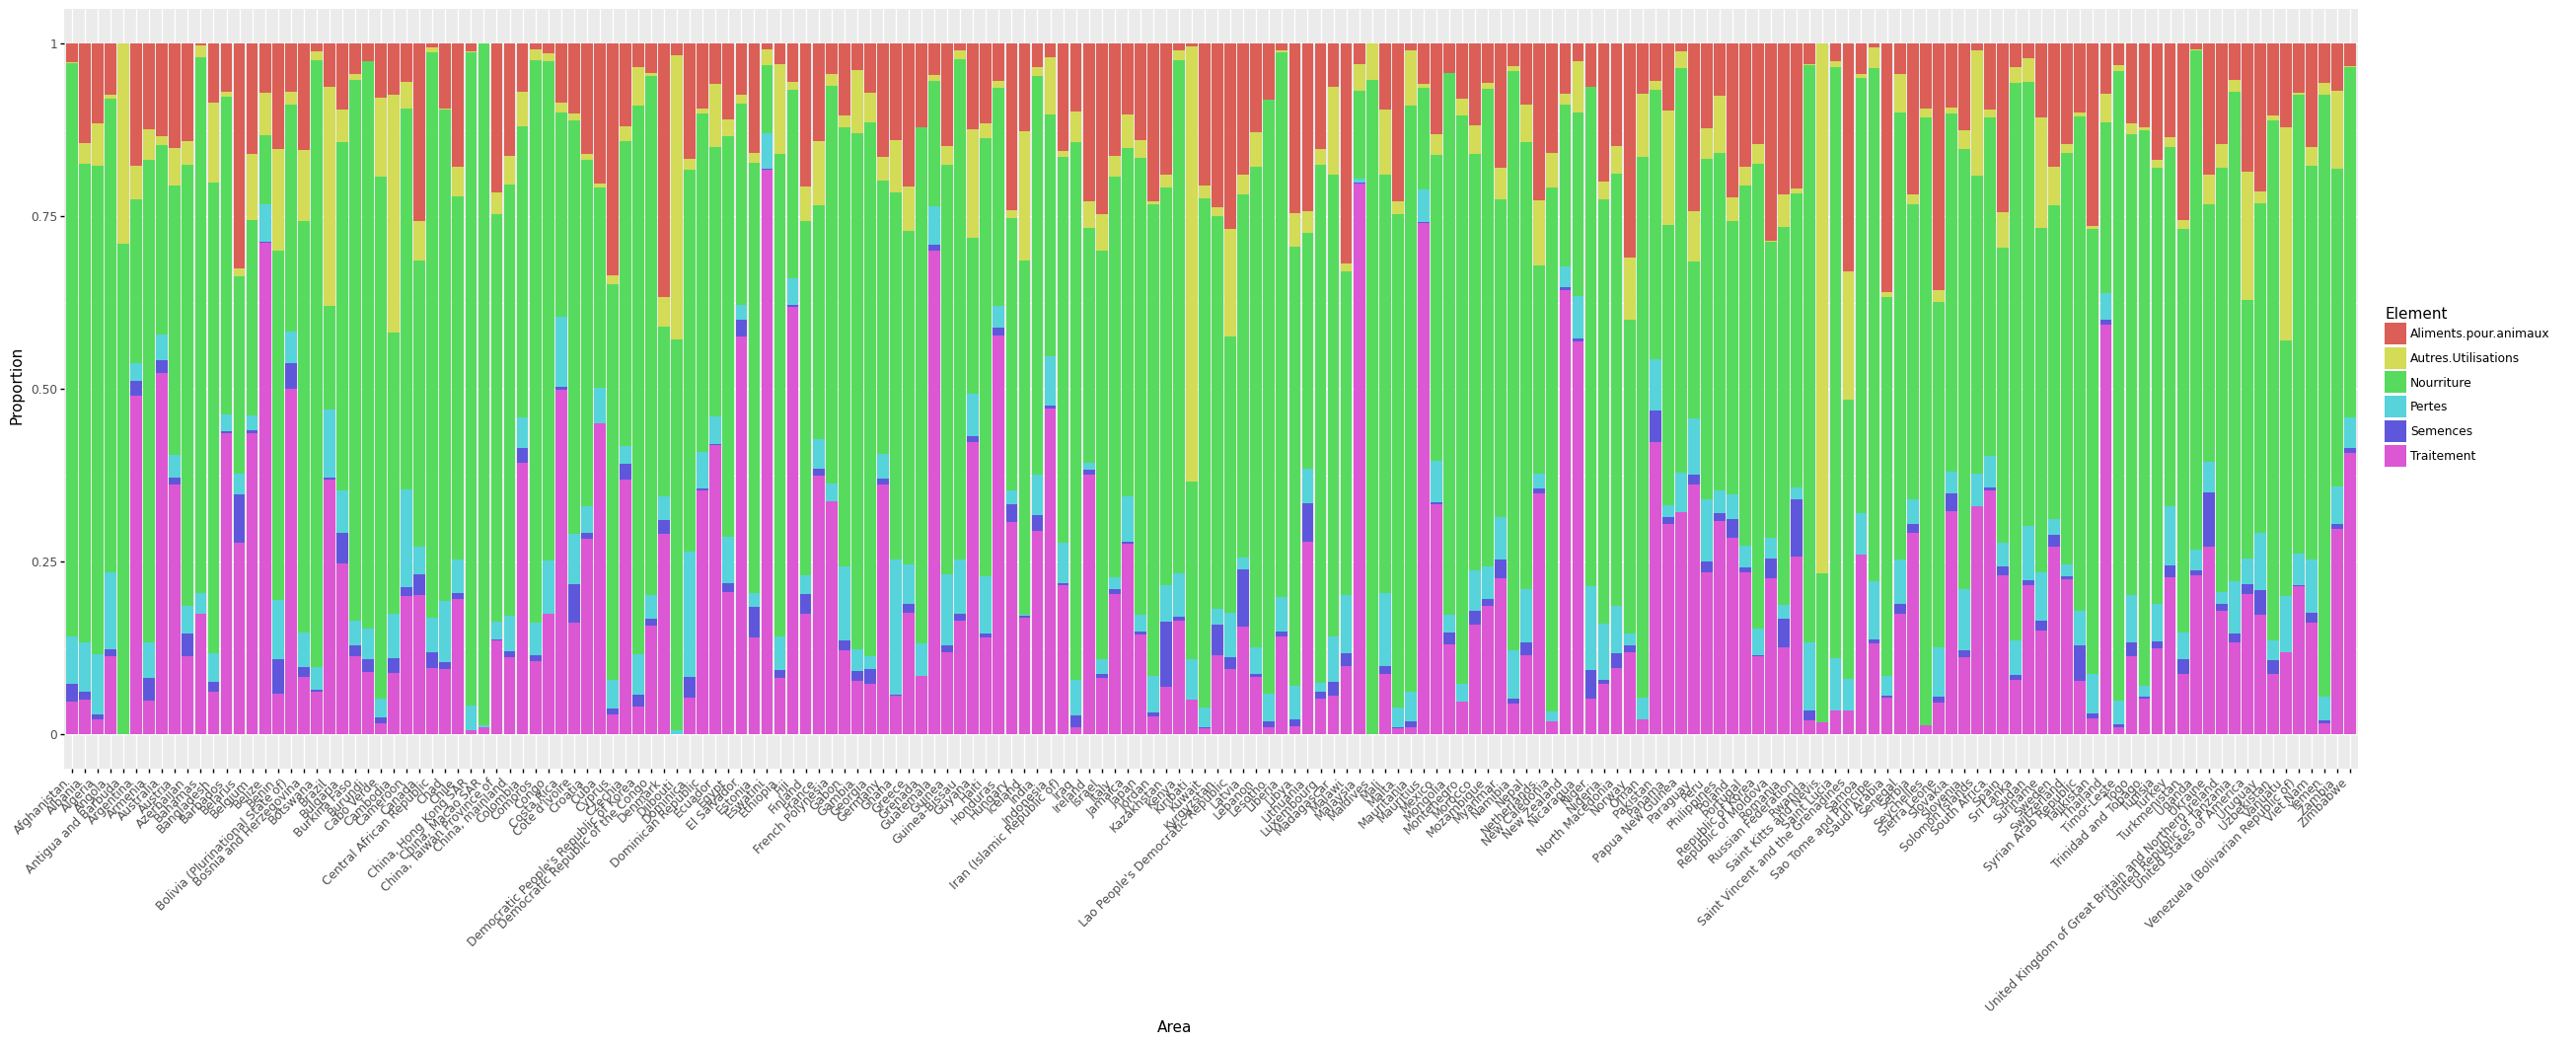

<ggplot: (90654168826)>

In [42]:
(ggplot(Utilisation_dispo_sum, aes(x='Area', y='Proportion', fill='Element'))
 + geom_col()
 + theme(figure_size=(30, 10))
 + theme(axis_text_x = element_text(angle = 45, hjust = 1))
 #+ scale_fill_brewer(type="qual",palette="Accent")
)

### 1b) Utilisation Globale par élément

In [43]:
#Somme des Elements
Utilisation_dispo_sumTot=Utilisation_dispo.groupby(['Element'], as_index=False).sum()
Utilisation_dispo_sumTot


Element  AreaCode  ElementCode  ItemCode      Year  \
0  Aliments.pour.animaux    544994     23530502  11034190   8596454   
1    Autres.Utilisations    693089     28269690  14608994  11063245   
2             Nourriture   1934434     78518340  40238987  30799590   
3                 Pertes    758233     30538203  15535220  12023337   
4               Semences    268412     11700659   5441303   4269989   
5             Traitement    399341     16470510   8323534   6474570   

        Value  
0  1357634.03  
1   849708.08  
2  5265476.89  
3   613028.00  
4   169176.05  
5  2824007.00

In [44]:
# Calcul des proportions par élément
Utilisation_dispo_sumTot['Proportion']=(Utilisation_dispo_sumTot['Value'])/Utilisation_dispo_sumTot['Value'].sum()
Utilisation_dispo_sumTot

Element  AreaCode  ElementCode  ItemCode      Year  \
0  Aliments.pour.animaux    544994     23530502  11034190   8596454   
1    Autres.Utilisations    693089     28269690  14608994  11063245   
2             Nourriture   1934434     78518340  40238987  30799590   
3                 Pertes    758233     30538203  15535220  12023337   
4               Semences    268412     11700659   5441303   4269989   
5             Traitement    399341     16470510   8323534   6474570   

        Value  Proportion  
0  1357634.03    0.122541  
1   849708.08    0.076695  
2  5265476.89    0.475265  
3   613028.00    0.055332  
4   169176.05    0.015270  
5  2824007.00    0.254897

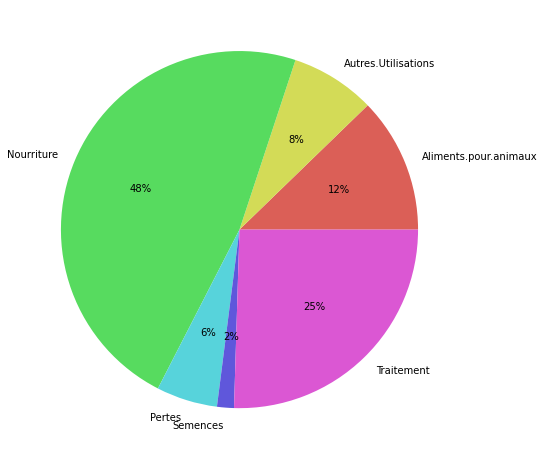

In [45]:
#define data
#data = [value1, value2, value3, ...]
#labels = ['label1', 'label2', 'label3', ...]

#define Seaborn color palette to use
colors = sns.color_palette('hls')[0:6]

#fig_dims = (6, 6)
#fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams["figure.figsize"] = (8,10)
plt.pie(Utilisation_dispo_sumTot['Proportion'], labels = Utilisation_dispo_sumTot["Element"], colors = colors, autopct='%.0f%%')
plt.show()

### 2a ) Utilisation des céréales par élément et par pays

In [46]:
Utilisation_dispo_cereal = bilan_cereale[bilan_cereale['Element Code'].isin(Elementcode_list)]
Utilisation_dispo_cereal_sum=Utilisation_dispo_cereal.groupby(['Area','Element'], as_index=False).sum()
Utilisation_dispo_cereal_sum['Proportion']=(Utilisation_dispo_cereal_sum['Value'])/Utilisation_dispo_cereal_sum.groupby('Area')['Value'].transform('sum')

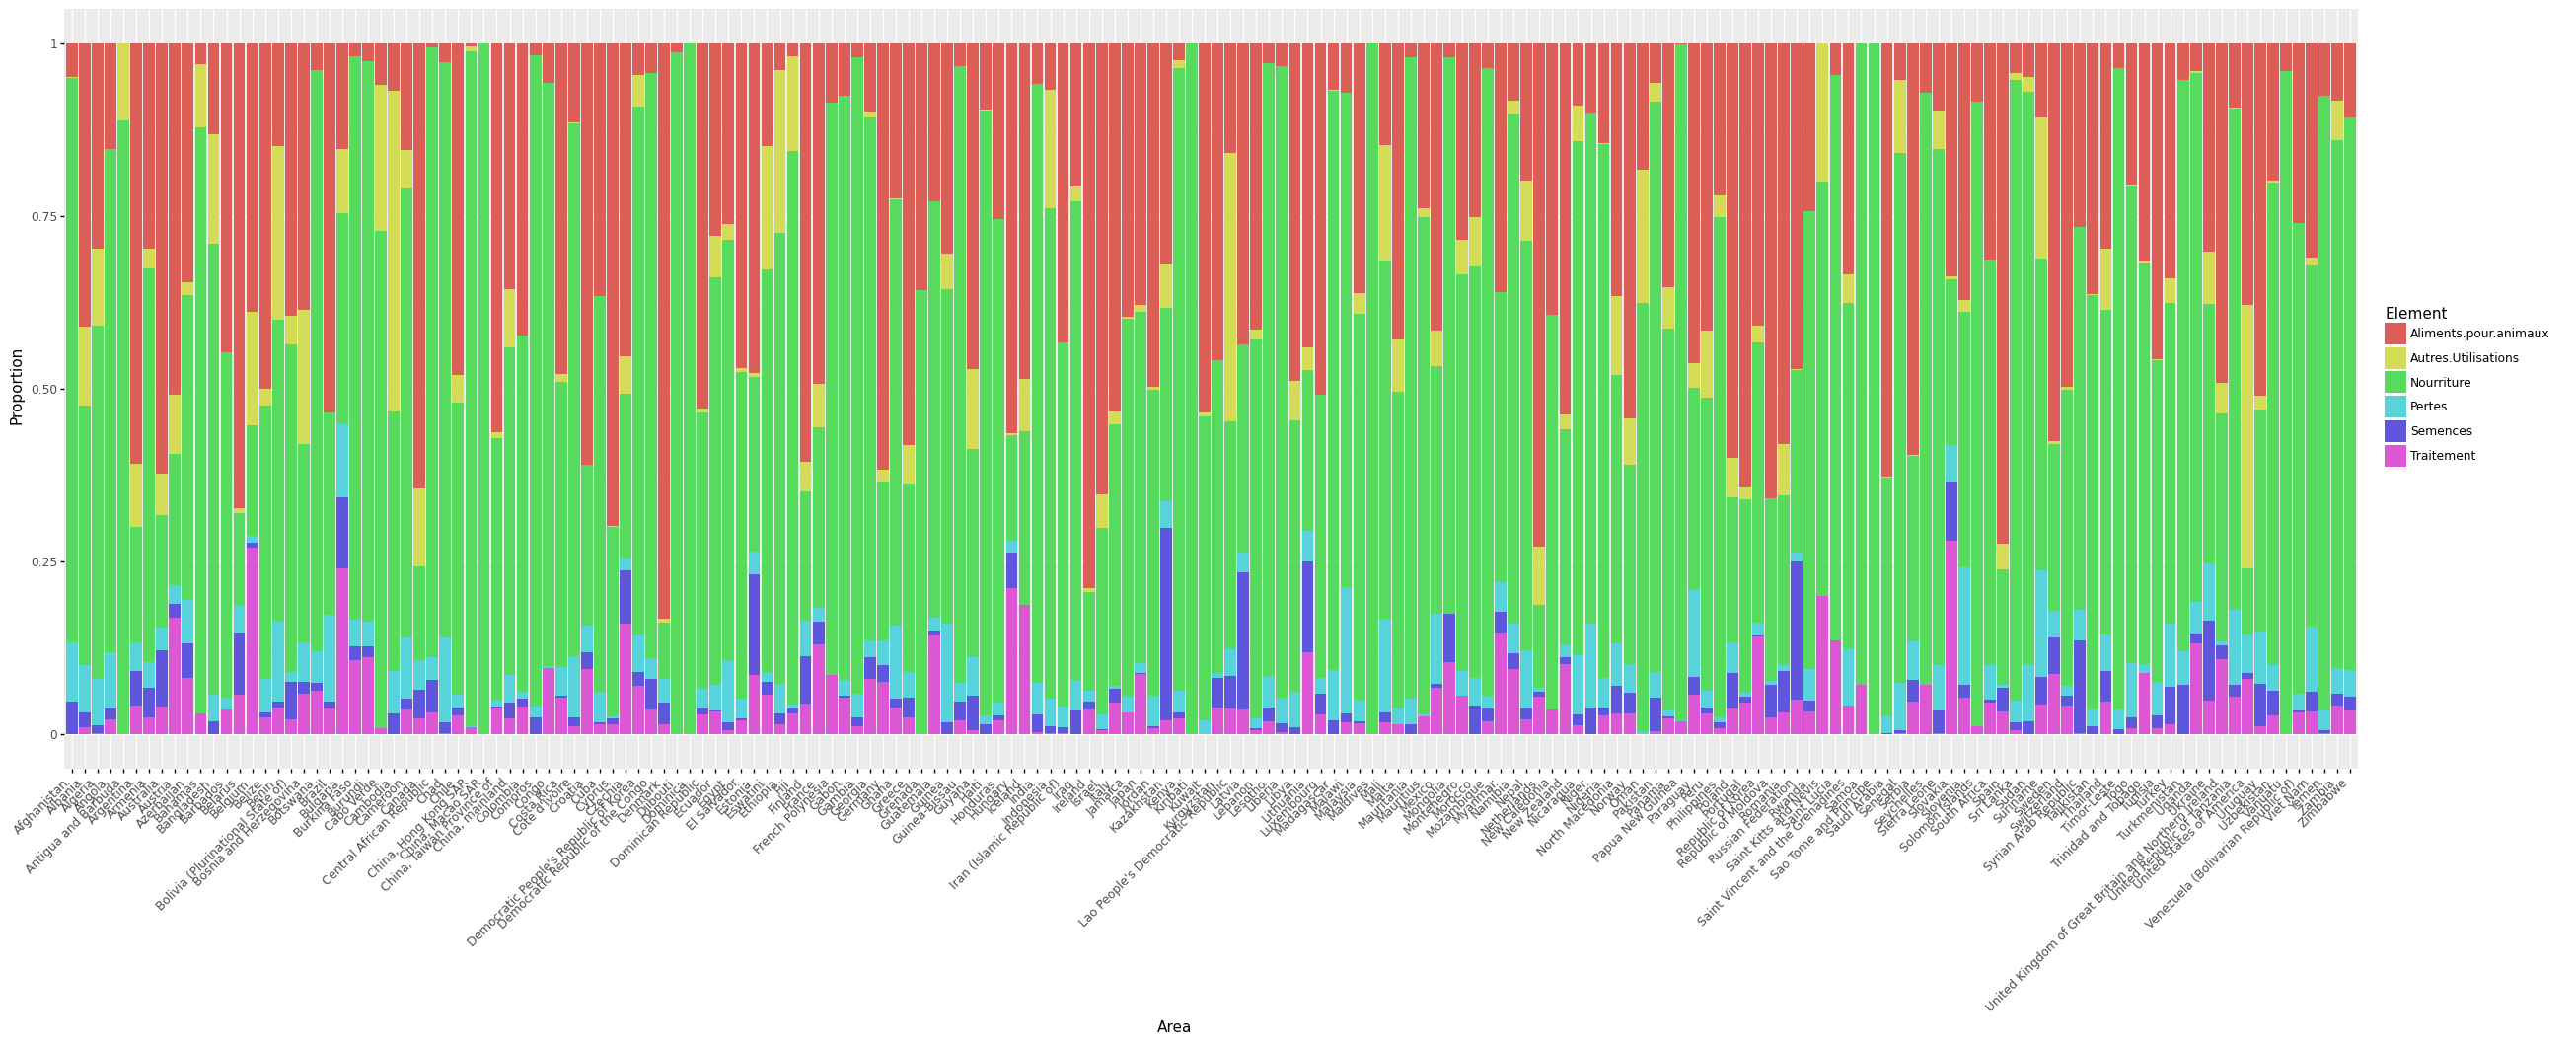

<ggplot: (90654622480)>

In [47]:
(ggplot(Utilisation_dispo_cereal_sum, aes(x='Area', y='Proportion', fill='Element'))
 + geom_col()
 + theme(figure_size=(30, 10))
 + theme(axis_text_x = element_text(angle = 45, hjust = 1))
 #+ scale_fill_brewer(type="qual",palette="Accent")
)

### 2b) Utilisation des céréales par élément

In [48]:
#bilan_cereale
Utilisation_dispo_cereal_sumTot=Utilisation_dispo_cereal.groupby(['Element'], as_index=False).sum()
Utilisation_dispo_cereal_sumTot['Proportion']=(Utilisation_dispo_cereal_sumTot['Value'])/Utilisation_dispo_cereal_sumTot['Value'].sum()
Utilisation_dispo_cereal_sumTot

Element  Area Code  Element Code    Year    Value  Proportion
0  Aliments.pour.animaux      22581        982738  359026   935717    0.328096
1    Autres.Utilisations      21057        865872  338856   279627    0.098047
2             Nourriture      22581        915276  359026  1310653    0.459562
3                 Pertes      21938        891402  350958   135469    0.047500
4               Semences      21341        928536  338856    80196    0.028120
5             Traitement      21181        867139  340873   110302    0.038676

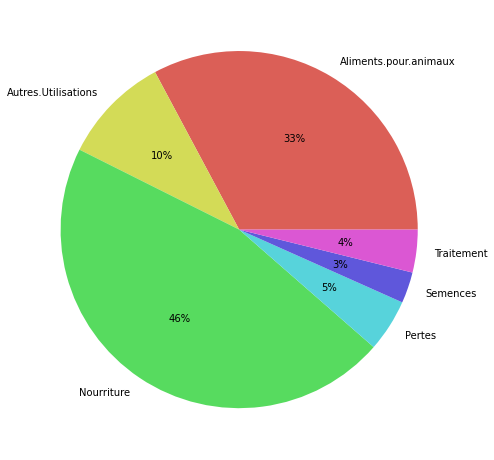

In [49]:
#create pie chart
plt.pie(Utilisation_dispo_cereal_sumTot['Proportion'], labels = Utilisation_dispo_cereal_sumTot["Element"], colors = colors, autopct='%.0f%%')
plt.rcParams["figure.figsize"] = (8,10)

plt.show()

In [50]:
# Calcul de la proportion de la valeur des Elements par Pays :
Utilisation_dispo_sum['Proportion']=(Utilisation_dispo_sum['Value'])/Utilisation_dispo_sum.groupby('Area')['Value'].transform('sum')
Utilisation_dispo_sum

Area                Element  AreaCode  ElementCode  ItemCode  \
0     Afghanistan  Aliments.pour.animaux        50       138025     64093   
1     Afghanistan    Autres.Utilisations        10        25770     13013   
2     Afghanistan             Nourriture       156       401076    204212   
3     Afghanistan                 Pertes        54       138321     70564   
4     Afghanistan               Semences        24        66324     30931   
...           ...                    ...       ...          ...       ...   
1063     Zimbabwe    Autres.Utilisations      5430       154620     79731   
1064     Zimbabwe             Nourriture     16290       462780    236949   
1065     Zimbabwe                 Pertes      7421       210043    106573   
1066     Zimbabwe               Semences      2534        77378     35975   
1067     Zimbabwe             Traitement      6335       179585     90779   

        Year     Value  Proportion  
0      50425    455.00    0.026429  
1      10085     40.00    0.002323  
2     157326  14274.00    0.829112  
3      54459   1197.00    0.069528  
4      24204    424.00    0.024628  
...      ...       ...         ...  
1063   60510     16.06    0.001890  
1064  181530   4307.20    0.506853  
1065   82697    375.00    0.044128  
1066   28238     67.00    0.007884  
1067   70595   3460.00    0.407158  

[1068 rows x 8 columns]

### 3) Utilisation par PIB

In [51]:
UtilisationcerealPIB=pd.merge(Utilisation_dispo_cereal_sum,(pib_en.loc[(pib_en['ElementCode'] == 6119)]), on='Area', how='left')
UtilisationcerealPIB

Area              Element_x  Area Code  Element Code  Year_x  \
0     Afghanistan  Aliments.pour.animaux          2          5521    2017   
1     Afghanistan    Autres.Utilisations          2          5154    2017   
2     Afghanistan             Nourriture          2          5142    2017   
3     Afghanistan                 Pertes          2          5123    2017   
4     Afghanistan               Semences          2          5527    2017   
...           ...                    ...        ...           ...     ...   
1030     Zimbabwe  Aliments.pour.animaux        181          5521    2017   
1031     Zimbabwe             Nourriture        181          5142    2017   
1032     Zimbabwe                 Pertes        181          5123    2017   
1033     Zimbabwe               Semences        181          5527    2017   
1034     Zimbabwe             Traitement        181          5131    2017   

      Value_x  Proportion  AreaCode  ElementCode             Element_y  \
0         403    0.048854       2.0       6119.0  Value US$ per capita   
1           7    0.000849       2.0       6119.0  Value US$ per capita   
2        6746    0.817796       2.0       6119.0  Value US$ per capita   
3         706    0.085586       2.0       6119.0  Value US$ per capita   
4         387    0.046915       2.0       6119.0  Value US$ per capita   
...       ...         ...       ...          ...                   ...   
1030      226    0.106755     181.0       6119.0  Value US$ per capita   
1031     1695    0.800661     181.0       6119.0  Value US$ per capita   
1032       80    0.037789     181.0       6119.0  Value US$ per capita   
1033       44    0.020784     181.0       6119.0  Value US$ per capita   
1034       72    0.034010     181.0       6119.0  Value US$ per capita   

      Item Code                    Item  Year_y Unit      Value_y  
0       22008.0  Gross Domestic Product  2017.0  US$   513.085978  
1       22008.0  Gross Domestic Product  2017.0  US$   513.085978  
2       22008.0  Gross Domestic Product  2017.0  US$   513.085978  
3       22008.0  Gross Domestic Product  2017.0  US$   513.085978  
4       22008.0  Gross Domestic Product  2017.0  US$   513.085978  
...         ...                     ...     ...  ...          ...  
1030    22008.0  Gross Domestic Product  2017.0  US$  1548.186368  
1031    22008.0  Gross Domestic Product  2017.0  US$  1548.186368  
1032    22008.0  Gross Domestic Product  2017.0  US$  1548.186368  
1033    22008.0  Gross Domestic Product  2017.0  US$  1548.186368  
1034    22008.0  Gross Domestic Product  2017.0  US$  1548.186368  

[1035 rows x 15 columns]

In [52]:
fig = px.scatter(UtilisationcerealPIB, x="Value_y", y="Proportion",facet_col="Element_x",facet_col_wrap=3,
                  trendline="ols",
            labels={
                     "Value_y": "PIB per capita du pays",
                     "Element_x": "Utilisation",
                     "Proportion": "Proportion",
                 },
                 height=600,
                  width=1000)
fig.show()

In [53]:
import statsmodels.api
import statsmodels.formula.api
model = statsmodels.formula.api.ols('Proportion ~ Value_y', data = UtilisationcerealPIB.loc[(UtilisationcerealPIB['Element_x'] == "Aliments.pour.animaux")])
result = model.fit()

In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Proportion   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     58.40
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.35e-12
Time:                        15:58:48   Log-Likelihood:                 44.223
No. Observations:                 177   AIC:                            -84.45
Df Residuals:                     175   BIC:                            -78.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2058      0.017     11.790      0.000       0.171       0.240
Value_y     5.738e-06   7.51e-07      7.642      0.000    4.26e-06    7.22e-06
==============================================================================
Omnibus:                        0.113   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.242
Skew:                          -0.041   Prob(JB):                        0.886
Kurtosis:                       2.839   Cond. No.                     2.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
print(result.f_pvalue) 
print('_____________________')
print(result.pvalues)

1.3500139033487798e-12
_____________________
Intercept    5.483377e-24
Value_y      1.350014e-12
dtype: float64


La part de l'utilisation des céréales pour les animaux est plus important dans les pays avec un plus fort PIB par habitant. 


La disponibilité intérieure total est en majeur partie utilisé pour l’alimentation humaine, mais certaines catégories ( céréales ) sont aussi massivement utilisé pour les animaux. 

La répartition de l’utilisation de la dispo intérieure dépend des pays ( céréales et totale )

Les pays à fort PIB ont une plus forte utilisation des céréales pour les animaux.  

## 2) L'inégalité de l'accès à la nourriture

In [56]:
ssNutriPrev_PIBperC=pd.merge(ssNutri_Prev_filter,(pib_en.loc[(pib_en['ElementCode'] == 6119)]), on='Area')
ssNutriPrev_PIBperC

AreaCode_x                                Area  ElementCode_x Element_x  \
0             2                         Afghanistan           6121     Value   
1             3                             Albania           6121     Value   
2             4                             Algeria           6121     Value   
3             7                              Angola           6121     Value   
4             9                           Argentina           6121     Value   
..          ...                                 ...            ...       ...   
104         215         United Republic of Tanzania           6121     Value   
105         155                             Vanuatu           6121     Value   
106         236  Venezuela (Bolivarian Republic of)           6121     Value   
107         237                            Viet Nam           6121     Value   
108         249                               Yemen           6121     Value   

     ItemCode                                             Item_x     Year_x  \
0      210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
1      210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
2      210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
3      210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
4      210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
..        ...                                                ...        ...   
104    210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
105    210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
106    210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
107    210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   
108    210041  Prevalence of undernourishment (percent) (3-ye...  2016-2018   

    Unit_x  Value_x  Note  AreaCode_y  ElementCode_y             Element_y  \
0        %     23.0   NaN           2           6119  Value US$ per capita   
1        %      4.1   NaN           3           6119  Value US$ per capita   
2        %      2.7   NaN           4           6119  Value US$ per capita   
3        %     15.4   NaN           7           6119  Value US$ per capita   
4        %      3.1   NaN           9           6119  Value US$ per capita   
..     ...      ...   ...         ...            ...                   ...   
104      %     24.1   NaN         215           6119  Value US$ per capita   
105      %      9.6   NaN         155           6119  Value US$ per capita   
106      %     22.2   NaN         236           6119  Value US$ per capita   
107      %      7.2   NaN         237           6119  Value US$ per capita   
108      %     46.6   NaN         249           6119  Value US$ per capita   

     Item Code                  Item_y  Year_y Unit_y       Value_y  
0        22008  Gross Domestic Product    2017    US$    513.085978  
1        22008  Gross Domestic Product    2017    US$   4514.204908  
2        22008  Gross Domestic Product    2017    US$   4109.701336  
3        22008  Gross Domestic Product    2017    US$   4095.811686  
4        22008  Gross Domestic Product    2017    US$  14627.615635  
..         ...                     ...     ...    ...           ...  
104      22008  Gross Domestic Product    2017    US$   1001.160919  
105      22008  Gross Domestic Product    2017    US$   3082.368364  
106      22008  Gross Domestic Product    2017    US$   8429.074575  
107      22008  Gross Domestic Product    2017    US$   2365.521494  
108      22008  Gross Domestic Product    2017    US$    745.087909  

[109 rows x 18 columns]

In [57]:
fig = px.scatter(ssNutriPrev_PIBperC, x="Value_y", y="Value_x",color="Area",
            labels={
                     "Value_y": "PIB per capita du pays",
                     "Value_x": "Pourcentage de personne<br>en état de sous-nutrition",
                     "Area": "Pays",
                 })
fig.show()

In [58]:
ssNutriTot_PIBperC=pd.merge(ssNutri_filter,(pib_en.loc[(pib_en['ElementCode'] == 6119)]), on='Area')
ssNutriTot_PIBperC

AreaCode_x                                Area  ElementCode_x Element_x  \
0            2                         Afghanistan           6132     Value   
1            3                             Albania           6132     Value   
2            4                             Algeria           6132     Value   
3            7                              Angola           6132     Value   
4            9                           Argentina           6132     Value   
..         ...                                 ...            ...       ...   
85         225                United Arab Emirates           6132     Value   
86         215         United Republic of Tanzania           6132     Value   
87         236  Venezuela (Bolivarian Republic of)           6132     Value   
88         237                            Viet Nam           6132     Value   
89         249                               Yemen           6132     Value   

    ItemCode                                             Item_x     Year_x  \
0     210011  Number of people undernourished (million) (3-y...  2016-2018   
1     210011  Number of people undernourished (million) (3-y...  2016-2018   
2     210011  Number of people undernourished (million) (3-y...  2016-2018   
3     210011  Number of people undernourished (million) (3-y...  2016-2018   
4     210011  Number of people undernourished (million) (3-y...  2016-2018   
..       ...                                                ...        ...   
85    210011  Number of people undernourished (million) (3-y...  2016-2018   
86    210011  Number of people undernourished (million) (3-y...  2016-2018   
87    210011  Number of people undernourished (million) (3-y...  2016-2018   
88    210011  Number of people undernourished (million) (3-y...  2016-2018   
89    210011  Number of people undernourished (million) (3-y...  2016-2018   

      Unit_x  Value_x  Note  AreaCode_y  ElementCode_y             Element_y  \
0   millions      8.3   NaN           2           6119  Value US$ per capita   
1   millions      0.1   NaN           3           6119  Value US$ per capita   
2   millions      1.1   NaN           4           6119  Value US$ per capita   
3   millions      4.6   NaN           7           6119  Value US$ per capita   
4   millions      1.4   NaN           9           6119  Value US$ per capita   
..       ...      ...   ...         ...            ...                   ...   
85  millions      0.3   NaN         225           6119  Value US$ per capita   
86  millions     13.2   NaN         215           6119  Value US$ per capita   
87  millions      6.5   NaN         236           6119  Value US$ per capita   
88  millions      6.8   NaN         237           6119  Value US$ per capita   
89  millions     13.0   NaN         249           6119  Value US$ per capita   

    Item Code                  Item_y  Year_y Unit_y       Value_y  
0       22008  Gross Domestic Product    2017    US$    513.085978  
1       22008  Gross Domestic Product    2017    US$   4514.204908  
2       22008  Gross Domestic Product    2017    US$   4109.701336  
3       22008  Gross Domestic Product    2017    US$   4095.811686  
4       22008  Gross Domestic Product    2017    US$  14627.615635  
..        ...                     ...     ...    ...           ...  
85      22008  Gross Domestic Product    2017    US$  40644.804043  
86      22008  Gross Domestic Product    2017    US$   1001.160919  
87      22008  Gross Domestic Product    2017    US$   8429.074575  
88      22008  Gross Domestic Product    2017    US$   2365.521494  
89      22008  Gross Domestic Product    2017    US$    745.087909  

[90 rows x 18 columns]

In [59]:
fig = px.scatter(ssNutriTot_PIBperC, x="Value_y", y="Value_x",color="Area",
            labels={
                     "Value_y": "PIB per capita du pays",
                     "Value_x": "Nombre total de personne<br>en état de sous-nutrition",
                     "Area": "Pays",
                 })
fig.show()

Certains Pays avec un fort PIB par habitant ont une part conséquente de personnes en état de sous nutrition :
- Nouvelle Calédonie
- Emirats Arabes Unis
- Macao

Le cas de l'Inde : 
- Capacité d'approvisionnement de 1.06 (elle est capable de produire 106% des besoins journaliers de ses habitants)
- 13.8% de la population sous alimentée
- Soit 185 Millions de personne

## 3) La politique d'utilisation de la disponibilité : Exemple ed la Thaïlande et du manioc

### a) Rappel des chiffres de la population totale et sous-alimentée

In [60]:
# La population totale de la Thailand
(population_en['Value'].loc[(population_en['Area'] == "Thailand")]*1000).values[0]

69210000

In [61]:
# Nombre de personne en sous nutrition
PopThaiSSnutri=(pd.to_numeric(sous_nutrition_en['Value'].loc[(sous_nutrition_en['Area'] == "Thailand") & (sous_nutrition_en['ItemCode'] == 210011)])*1000000).values[0]
PopThaiSSnutri

5400000.0

In [62]:
# Pourcentage de la population en état de sous nutrition
pd.to_numeric(sous_nutrition_en['Value'].loc[(sous_nutrition_en['Area'] == "Thailand") & (sous_nutrition_en['ItemCode'] == 210041)]).values[0]

7.7

La population totale de la Thailand est de **69210000** habitants dont **5400000** personnes sont en état de sous nutrition, soit **7.7 %** de la population.

### b) L’utilisation de la disponibilité du manioc

In [63]:
# Valeur de la production de manioc
productionManiocThai=pd.to_numeric(dispo_alimentaire_total['Value'].loc[(dispo_alimentaire_total['Area'] == "Thailand") & 
                                                (dispo_alimentaire_total['Item'] == 'Cassava and products') & 
                                                (dispo_alimentaire_total['Element'] == "Production")]).values[0]
productionManiocThai

30495.0

In [64]:
# Valeur de l'exportation de manioc
exportationManiocThai=pd.to_numeric(dispo_alimentaire_total['Value'].loc[(dispo_alimentaire_total['Area'] == "Thailand") & 
                                                (dispo_alimentaire_total['Item'] == 'Cassava and products') & 
                                                (dispo_alimentaire_total['Element'] == "Export Quantity")]).values[0]
exportationManiocThai

29409.0

In [65]:
round((exportationManiocThai/productionManiocThai)*100,2)

96.44

La Thailand produit **30495 tonnes** de manioc et ses dérivés. Cependant, elle en exporte **29409 tonnes** soit **96.44 %** de sa production.


### c) Le manioc pour combattre la sous-nutrition

In [66]:
capaciteNutritionManioc=((157*productionManiocThai*1000)/0.1)/2400
print(capaciteNutritionManioc)

19948812.5


In [67]:
maniocRequis=(PopThaiSSnutri*productionManiocThai)/capaciteNutritionManioc
print(maniocRequis)

8254.777070063694


In [68]:
pourcentageProduction=(maniocRequis/productionManiocThai)*100
round(pourcentageProduction,2)

27.07

La valeur energétique du manioc est de **157 kcal** pour 100g (0,1 kg). Avec une production de **30495 tonnes**, la Thailand serait en capacité de nourrir **19948812** personnes. Afin de subvenir au besoin de sa population en sous-nutrition, il faudrait **8254.78 tonnes** de manioc, soit **27.07 %** de leur production totale.